# Initial Set-Up

In [122]:
import pickle
import pandas as pd
import matplotlib
import os
import re

import collections
import datetime
import time

import geopandas as gpd

import numpy as np

import rasterio

from difflib import get_close_matches

from fuzzywuzzy import process
from fuzzywuzzy import fuzz

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

import geopandas as gpd

import seaborn as sns

import numpy as np

import scipy

from matplotlib.colors import LogNorm

from sklearn import preprocessing

import dask.dataframe as dd

import xclim


In [7]:
hq = pd.read_csv("../../data/companyData/justHQs.csv") 


min_lat = hq.latitude.min()
max_lat = hq.latitude.max()

min_lon = hq.longitude.min()
max_lon = hq.longitude.max()

In [19]:
hq[['']]

,Unnamed: 0,year,zipcode,latitude,longitude
0,0,1997,44146,41.412780,-81.506160
1,1,1997,85260,33.619630,-111.901710
2,2,1997,8876,40.597780,-74.690650
3,3,1997,60411,41.521760,-87.617840
4,4,1997,74102,36.150890,-95.993980
...,...,...,...,...,...
36807,61256,2023,19103,39.954200,-75.168600
36808,61257,2023,6901,41.049852,-73.538904
36809,61258,2023,10118,40.748100,-73.985700
36810,61260,2023,10036,40.754754,-73.985006


In [ ]:
baselineName = '../../../../../../../Volumes/backup2/dissData/cmip6Data/hist/mirocHQs_198199.csv'
baseline = pd.read_csv(baselineName)

# Weather Data
## *this is how we process the cmip6Data


In [40]:
import netCDF4 as nc
import xarray as xr

In [100]:
# https://kpegion.github.io/Pangeo-at-AOES/examples/advanced-analysis.html

In [221]:
start = time.time()


file = '../../../../../../../Volumes/backup2/dissData/cmip6Data/hist/pr/pr_day_MIROC6_historical_r*i1p1f1_gn_19*.nc'
# file = '../../../../../../../Volumes/backup2/dissData/cmip6Data/hist/pr/pr_day_MIROC6_historical_r*i1p1f1_gn_19800101-19891231.nc'
data = xr.open_mfdataset(file,concat_dim=['ensemble'],combine='nested',decode_times=True)


# , ,combine = 'by_coords')   #  nc.Dataset(file)

print(time.time() - start)

9.405879020690918


In [222]:
print(time.time() - start)
data.coords['lon'] = (data.coords['lon'] + 180) % 360 - 180
print(time.time() - start)
data = data.sortby(data.lon)
print(time.time() - start)

data = data.sel(lat=slice(min_lat,max_lat), 
                lon=slice(min_lon,max_lon))
data['time'] = pd.to_datetime(data.time.values.astype(str))

29.043031930923462
29.04560089111328
29.055726766586304


In [203]:
byCoord = data.mean(dim = ['ensemble','time'])
byCoord

<xarray.Dataset>
Dimensions:   (lat: 25, bnds: 2, lon: 64)
Coordinates:
  * lat       (lat) float64 21.71 23.11 ... 55.33
  * lon       (lon) float64 -157.5 ... -68.91
Dimensions without coordinates: bnds
Data variables:
    lat_bnds  (lat, bnds) float64 dask.array<chunksize=(25, 2), meta=np.ndarray>
    lon_bnds  (lon, bnds) float64 dask.array<chunksize=(64, 2), meta=np.ndarray>
    pr        (lat, lon) float32 dask.array<chunksize=(25, 64), meta=np.ndarray>

In [204]:
data.quantile(0.95, dim = ['time'])

<xarray.Dataset>
Dimensions:    (ensemble: 50, bnds: 2, lat: 25, lon: 64)
Coordinates:
  * lat        (lat) float64 21.71 23.11 ... 55.33
  * lon        (lon) float64 -157.5 ... -68.91
    quantile   float64 0.95
Dimensions without coordinates: ensemble, bnds
Data variables:
    time_bnds  (ensemble, bnds) float64 dask.array<chunksize=(1, 2), meta=np.ndarray>
    lat_bnds   (ensemble, lat, bnds) float64 dask.array<chunksize=(1, 25, 2), meta=np.ndarray>
    lon_bnds   (ensemble, lon, bnds) float64 dask.array<chunksize=(1, 64, 2), meta=np.ndarray>
    pr         (ensemble, lat, lon) float64 dask.array<chunksize=(1, 25, 64), meta=np.ndarray>

In [212]:
byCoord = data.mean(dim = ['ensemble','lat','lon'])

In [214]:
start = time.time()
test = byCoord.pr.to_numpy()
time.time() - start

303.82281708717346

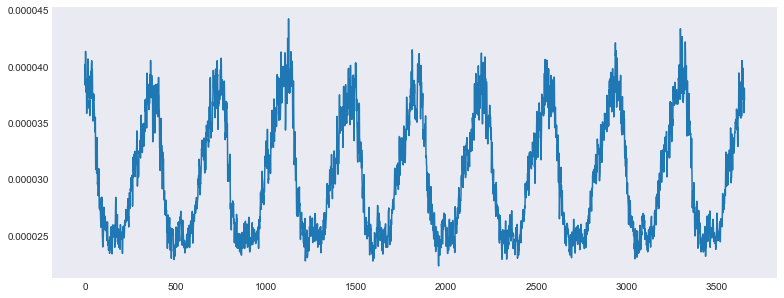

In [220]:
plt.plot(test)

In [ ]:
# numpy and xarray and all that
# https://www.earthinversion.com/utilities/reading-NetCDF4-data-in-python/

In [206]:
data.ensemble == 1

<xarray.DataArray 'ensemble' (ensemble: 50)>
array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])
Dimensions without coordinates: ensemble

In [187]:
# https://metview.readthedocs.io/en/latest/examples/ens_mean_spread_xarray.html
# data.mean(dim = 'ensemble')
overall = data.mean(dim = ['lat','lon'])
overall.pr.plot(hue = 'ensemble')

KeyboardInterrupt: 

In [ ]:
plt.style.use("seaborn-dark")
plt.rcParams["figure.figsize"] = (13, 5)
ens.tas.plot(hue="realization")
plt.show()

In [179]:
# this takes the ensemble mean and then the mean over time
data_emean = data.mean()# .mean() 
print(data_emean)

<xarray.Dataset>
Dimensions:   ()
Data variables:
    lat_bnds  float64 dask.array<chunksize=(), meta=np.ndarray>
    lon_bnds  float64 dask.array<chunksize=(), meta=np.ndarray>
    pr        float32 dask.array<chunksize=(), meta=np.ndarray>


In [123]:
import glob

import xarray as xr

import xclim as xc

# Set display to HTML sytle (for fancy output)
xr.set_options(display_style="html", display_width=50)

import matplotlib.pyplot as plt

%matplotlib inline

from xclim import ensembles

In [157]:
len(glob.glob('../../../../../../../Volumes/backup2/dissData/cmip6Data/hist/pr/pr_day_MIROC6_historical_r1*i1p1f1_gn_19800101-19891231.nc'))
datasets = glob.glob('../../../../../../../Volumes/backup2/dissData/cmip6Data/hist/pr/pr_day_MIROC6_historical_r1*i1p1f1_gn_19800101-19891231.nc')
datasets

['../../../../../../../Volumes/backup2/dissData/cmip6Data/hist/pr/pr_day_MIROC6_historical_r10i1p1f1_gn_19800101-19891231.nc',
 '../../../../../../../Volumes/backup2/dissData/cmip6Data/hist/pr/pr_day_MIROC6_historical_r11i1p1f1_gn_19800101-19891231.nc',
 '../../../../../../../Volumes/backup2/dissData/cmip6Data/hist/pr/pr_day_MIROC6_historical_r12i1p1f1_gn_19800101-19891231.nc',
 '../../../../../../../Volumes/backup2/dissData/cmip6Data/hist/pr/pr_day_MIROC6_historical_r13i1p1f1_gn_19800101-19891231.nc',
 '../../../../../../../Volumes/backup2/dissData/cmip6Data/hist/pr/pr_day_MIROC6_historical_r14i1p1f1_gn_19800101-19891231.nc',
 '../../../../../../../Volumes/backup2/dissData/cmip6Data/hist/pr/pr_day_MIROC6_historical_r15i1p1f1_gn_19800101-19891231.nc',
 '../../../../../../../Volumes/backup2/dissData/cmip6Data/hist/pr/pr_day_MIROC6_historical_r16i1p1f1_gn_19800101-19891231.nc',
 '../../../../../../../Volumes/backup2/dissData/cmip6Data/hist/pr/pr_day_MIROC6_historical_r17i1p1f1_gn_1980010

In [161]:
data.ensemble_percentiles(0.5)

AttributeError: 'Dataset' object has no attribute 'ensemble_percentiles'

In [159]:
# file = 
# data = xr.open_mfdataset(file,concat_dim='ensemble',combine='nested',decode_times=True)

ens = ensembles.create_ensemble(datasets, mf_flag = True)

TypeError: create_ensemble() got an unexpected keyword argument 'combine'

In [6]:
geoHQ = gpd.GeoDataFrame(
    allIG,
    geometry=gpd.points_from_xy(
        allIG["longitude"],
        allIG["latitude"],
    ),
    crs={"init":"EPSG:4326"},
)

NameError: name 'allIG' is not defined

In [7]:
geoHQ['longitude']

NameError: name 'geoHQ' is not defined

In [ ]:
one_point = data["pr"].sel(lat=50, lon=50)

In [ ]:
pd.DataFrame(test.temperature[test.year == 2010]).plot()

Now go through and make this iterable for the entire list.

In [ ]:
i = 0
data.pr.sel(allIG.iloc[0,:], method='nearest')

In [ ]:
hqPost2010 = geoHQ[geoHQ.archive_version_year > 2010].reset_index()

In [ ]:
start = time.time()



tempsList = list()
for i in range(0,hqPost2010.shape[0]):
    nearbyTemps = temps.sel(hqPost2010.loc[i,['latitude','longitude']], method='nearest')
    
    tempsList.append(list(np.array(nearbyTemps.temperature[nearbyTemps.year == hqPost2010.archive_version_year[i]])))

    if (i%100 == 0):
        print(i)
    
print(time.time() - start)






In [ ]:
outfile =  'data/hqDailyTemperatures.pkl'
with open(outfile, 'wb') as pickle_file:
    pickle.dump(tempsList, pickle_file)

# Now let's do the percentiles

In [3]:
baselineName = '../../../../../../../Volumes/backup2/dissData/cmip6Data/hist/mirocHQs_198199.csv'
baseline = pd.read_csv(baselineName)

In [4]:
baseline.s.unique()

array([25, 26, 27, 28, 29])

In [5]:
baseline[baseline.variable == 'tasmax_hist']

,zipcode,s,variable,value,year,quarter
7011171,1226,25,tasmax_hist,283.346527,1981,Q1
7011172,1434,25,tasmax_hist,284.412964,1981,Q1
7011173,1460,25,tasmax_hist,284.412964,1981,Q1
7011174,1473,25,tasmax_hist,284.412964,1981,Q1
7011175,1507,25,tasmax_hist,284.412964,1981,Q1
...,...,...,...,...,...,...
148008865,99214,29,tasmax_hist,263.316100,1999,Q4
148008866,99216,29,tasmax_hist,263.316100,1999,Q4
148008867,99336,29,tasmax_hist,272.129000,1999,Q4
148008868,99362,29,tasmax_hist,269.444500,1999,Q4


In [6]:
quantsPrecip   = baseline[baseline.variable == 'pr_hist'][['zipcode','variable','quarter','value']].\
    groupby(['zipcode','variable','quarter']).quantile(.95).reset_index()
quantsPrecip.rename(columns = {'value': 'quantCutoff'}, inplace = True)
quantsPrecip['daysExtreme'] = 4.5


In [7]:
quantsPrecip.head()

,zipcode,variable,quarter,quantCutoff,daysExtreme
0,1226,pr_hist,Q1,0.000222,4.5
1,1226,pr_hist,Q2,0.000254,4.5
2,1226,pr_hist,Q3,0.000293,4.5
3,1226,pr_hist,Q4,0.000254,4.5
4,1434,pr_hist,Q1,0.000232,4.5


Find number of days above 90F.

In [8]:
temp = baseline[baseline.variable == 'tasmax_hist'].drop(columns = {'s','year'})
temp.head()

,zipcode,variable,value,quarter
7011171,1226,tasmax_hist,283.346527,Q1
7011172,1434,tasmax_hist,284.412964,Q1
7011173,1460,tasmax_hist,284.412964,Q1
7011174,1473,tasmax_hist,284.412964,Q1
7011175,1507,tasmax_hist,284.412964,Q1


In [55]:
quantsTemp = baseline[baseline.variable == 'tasmax_hist'].drop(columns = {'s','year'})
quantsTemp['daysExtreme'] = 1*(quantsTemp.value > 305.3)
quantsTemp = quantsTemp.groupby(['zipcode', 'variable', 'quarter']).median().reset_index()
quantsTemp.rename(columns = {'value': 'quantCutoff'}, inplace = True)

quantsTemp.daysExtreme = quantsTemp.daysExtreme*90
quantsTemp.quantCutoff = 305.3


quantsTemp.head()

,zipcode,variable,quarter,quantCutoff,daysExtreme
0,1226,tasmax_hist,Q1,305.3,0.0
1,1226,tasmax_hist,Q2,305.3,0.0
2,1226,tasmax_hist,Q3,305.3,0.0
3,1226,tasmax_hist,Q4,305.3,0.0
4,1434,tasmax_hist,Q1,305.3,0.0


In [56]:
quantsPrecip.head()

,zipcode,variable,quarter,quantCutoff,daysExtreme
0,1226,pr_hist,Q1,0.000222,4.5
1,1226,pr_hist,Q2,0.000254,4.5
2,1226,pr_hist,Q3,0.000293,4.5
3,1226,pr_hist,Q4,0.000254,4.5
4,1434,pr_hist,Q1,0.000232,4.5


In [57]:
quants = quantsPrecip.append(quantsTemp)

In [58]:
quants.head()

,zipcode,variable,quarter,quantCutoff,daysExtreme
0,1226,pr_hist,Q1,0.000222,4.5
1,1226,pr_hist,Q2,0.000254,4.5
2,1226,pr_hist,Q3,0.000293,4.5
3,1226,pr_hist,Q4,0.000254,4.5
4,1434,pr_hist,Q1,0.000232,4.5


And apply them to the next period.

In [13]:
nextPeriodName = '../../../../../../../Volumes/backup2/dissData/cmip6Data/proj/mirocHQs_202040.csv'
nextPeriod = pd.read_csv(nextPeriodName)# .drop(columns = ['s'])

In [14]:
nextPeriod.shape[0]/len(nextPeriod.zipcode.unique())/365/18/2/4

1.4594748858447488

In [15]:
nextPeriod.head()

,zipcode,s,variable,value,year,quarter
0,1226,25,pr_hist,3.134727e-17,2020,Q1
1,1434,25,pr_hist,3.134727e-17,2020,Q1
2,1460,25,pr_hist,3.134727e-17,2020,Q1
3,1473,25,pr_hist,3.134727e-17,2020,Q1
4,1507,25,pr_hist,3.134727e-17,2020,Q1


In [16]:
quants.daysExtreme

0       4.500000
1       4.500000
2       4.500000
3       4.500000
4       4.500000
          ...   
8527    0.000000
8528    0.000000
8529    0.197802
8530    0.164760
8531    0.000000
Name: daysExtreme, Length: 17064, dtype: float64

In [17]:
nextPeriod = nextPeriod.merge(quants)
nextPeriod.head()

,zipcode,s,variable,value,year,quarter,quantCutoff,daysExtreme
0,1226,25,pr_hist,3.134727e-17,2020,Q1,0.000222,4.5
1,1226,25,pr_hist,1.015828e-04,2020,Q1,0.000222,4.5
2,1226,25,pr_hist,4.030747e-05,2020,Q1,0.000222,4.5
3,1226,25,pr_hist,1.843720e-05,2020,Q1,0.000222,4.5
4,1226,25,pr_hist,1.910946e-05,2020,Q1,0.000222,4.5


In [18]:
nextPeriod['extreme'] = 1*(nextPeriod.value > nextPeriod.quantCutoff)

In [19]:
# nextPeriod.to_csv("../../data/companyData/nextPeriodExtremes.csv")

In [20]:
nextPeriod.head()

,zipcode,s,variable,value,year,quarter,quantCutoff,daysExtreme,extreme
0,1226,25,pr_hist,3.134727e-17,2020,Q1,0.000222,4.5,0
1,1226,25,pr_hist,1.015828e-04,2020,Q1,0.000222,4.5,0
2,1226,25,pr_hist,4.030747e-05,2020,Q1,0.000222,4.5,0
3,1226,25,pr_hist,1.843720e-05,2020,Q1,0.000222,4.5,0
4,1226,25,pr_hist,1.910946e-05,2020,Q1,0.000222,4.5,0


In [21]:
nextPeriod.year

0            2020
1            2020
2            2020
3            2020
4            2020
             ... 
163622425    2040
163622426    2040
163622427    2040
163622428    2040
163622429    2040
Name: year, Length: 163622430, dtype: int64

In [22]:
nextPeriod['yearQuarter'] = nextPeriod.year.astype('int64') + nextPeriod.quarter.str[1:2].astype('int64')/4

In [23]:
nextPeriod.head()

,zipcode,s,variable,value,year,quarter,quantCutoff,daysExtreme,extreme,yearQuarter
0,1226,25,pr_hist,3.134727e-17,2020,Q1,0.000222,4.5,0,2020.25
1,1226,25,pr_hist,1.015828e-04,2020,Q1,0.000222,4.5,0,2020.25
2,1226,25,pr_hist,4.030747e-05,2020,Q1,0.000222,4.5,0,2020.25
3,1226,25,pr_hist,1.843720e-05,2020,Q1,0.000222,4.5,0,2020.25
4,1226,25,pr_hist,1.910946e-05,2020,Q1,0.000222,4.5,0,2020.25


In [ ]:
nextPeriod[['zipcode']].drop_duplicates().shape

In [42]:
nextPeriod.head()

,zipcode,s,variable,value,year,quarter,quantCutoff,daysExtreme,extreme,yearQuarter
0,1226,25,pr_hist,3.134727e-17,2020,Q1,0.000222,4.5,0,2020.25
1,1226,25,pr_hist,1.015828e-04,2020,Q1,0.000222,4.5,0,2020.25
2,1226,25,pr_hist,4.030747e-05,2020,Q1,0.000222,4.5,0,2020.25
3,1226,25,pr_hist,1.843720e-05,2020,Q1,0.000222,4.5,0,2020.25
4,1226,25,pr_hist,1.910946e-05,2020,Q1,0.000222,4.5,0,2020.25


In [43]:
nextPeriod[nextPeriod.variable == 'pr_hist'].extreme.describe()

count    8.181122e+07
mean     5.119439e-02
std      2.203940e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: extreme, dtype: float64

In [44]:
quarterlyExtremes = nextPeriod[['variable','s','year','quarter','yearQuarter','zipcode','extreme']].\
    groupby(['variable','s','year','quarter','yearQuarter','zipcode']).sum().reset_index()

In [45]:
zipLats = pd.read_csv("../../data/companyData/quarterlyExtremesMean.csv")[['zipcode','latitude','longitude']].\
    groupby(['zipcode']).mean().reset_index()

quarterlyExtremes = quarterlyExtremes.merge(zipLats)

In [46]:
quarterlyExtremes.head()

,variable,s,year,quarter,yearQuarter,zipcode,extreme,latitude,longitude
0,pr_hist,25,2020,Q1,2020.25,1226,3,42.47064,-73.17891
1,pr_hist,25,2020,Q2,2020.50,1226,6,42.47064,-73.17891
2,pr_hist,25,2020,Q3,2020.75,1226,4,42.47064,-73.17891
3,pr_hist,25,2020,Q4,2021.00,1226,4,42.47064,-73.17891
4,pr_hist,25,2021,Q1,2021.25,1226,7,42.47064,-73.17891


In [36]:
quarterlyExtremes.head()

,variable,year,quarter,yearQuarter,zipcode,extreme,latitude,longitude
0,pr_hist,2020,Q1,2020.25,1226,25,42.47064,-73.17891
1,pr_hist,2020,Q2,2020.50,1226,21,42.47064,-73.17891
2,pr_hist,2020,Q3,2020.75,1226,23,42.47064,-73.17891
3,pr_hist,2020,Q4,2021.00,1226,28,42.47064,-73.17891
4,pr_hist,2021,Q1,2021.25,1226,26,42.47064,-73.17891


In [41]:
quarterlyExtremes.to_csv("../../data/companyData/quarterlyExtremesAll.csv")

In [47]:
quarterlyExtremesMean = quarterlyExtremes[['variable','quarter','zipcode','latitude','longitude','extreme']].\
    groupby(['variable','quarter','zipcode','latitude','longitude']).mean().reset_index()

In [50]:
quarterlyExtremesMean[quarterlyExtremesMean.variable == 'tasmax_hist'].extreme.describe()

count    8532.000000
mean       18.586791
std        26.368628
min         0.000000
25%         0.000000
50%         4.600000
75%        27.409524
max        91.533333
Name: extreme, dtype: float64

In [49]:
quarterlyExtremesMean[quarterlyExtremesMean.variable == 'pr_hist'].extreme.describe()

count    8532.000000
mean        4.675145
std         0.500942
min         3.371429
25%         4.304762
50%         4.666667
75%         5.028571
max         6.571429
Name: extreme, dtype: float64

In [51]:
quarterlyExtremesMean.head()

,variable,quarter,zipcode,latitude,longitude,extreme
0,pr_hist,Q1,1226,42.47064,-73.178910,5.295238
1,pr_hist,Q1,1434,42.53714,-71.626140,5.400000
2,pr_hist,Q1,1460,42.51834,-71.519490,5.400000
3,pr_hist,Q1,1473,42.55072,-71.900980,5.400000
4,pr_hist,Q1,1507,42.14293,-71.959055,5.400000


In [52]:
quarterlyExtremesMean = quarterlyExtremesMean.merge(quants[['zipcode','variable','quarter','daysExtreme']])
quarterlyExtremesMean.head()

,variable,quarter,zipcode,latitude,longitude,extreme,daysExtreme
0,pr_hist,Q1,1226,42.47064,-73.178910,5.295238,4.5
1,pr_hist,Q1,1434,42.53714,-71.626140,5.400000,4.5
2,pr_hist,Q1,1460,42.51834,-71.519490,5.400000,4.5
3,pr_hist,Q1,1473,42.55072,-71.900980,5.400000,4.5
4,pr_hist,Q1,1507,42.14293,-71.959055,5.400000,4.5


In [54]:
quarterlyExtremesMean.to_csv("../../data/companyData/quarterlyExtremesMean.csv")

In [69]:
zipLats.head()

,zipcode,latitude,longitude
0,1226,42.47064,-73.17891
1,1434,42.53712,-71.62612
2,1434,42.53716,-71.62616
3,1460,42.51834,-71.51949
4,1473,42.55072,-71.90098


In [54]:
quarterlyExtremesMean.groupby(['variable']).extreme.describe()

,count,mean,std,min,25%,50%,75%,max
variable,,,,,,,,
pr_hist,30412.0,4.708987,0.904902,2.428571,4.095238,4.571429,5.333333,7.571429
tasmax_hist,30412.0,17.414102,26.551453,0.000000,0.000000,2.000000,25.619048,91.761905


------------------------------

In [46]:
# we might have multiple records from within the same zipcode
quarterlyExtremesMean = quarterlyExtremes[['variable','quarter','zipcode','extreme']].\
    groupby(['variable','quarter','zipcode']).mean().reset_index()

# .groupby(['variable','quarter','zipcode']).mean().reset_index()


variable
pr_hist        AxesSubplot(0.125,0.125;0.775x0.755)
tasmax_hist    AxesSubplot(0.125,0.125;0.775x0.755)
Name: extreme, dtype: object

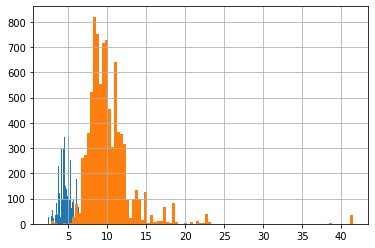

In [50]:
quarterlyExtremesMean.groupby('variable').extreme.hist(bins = 100)

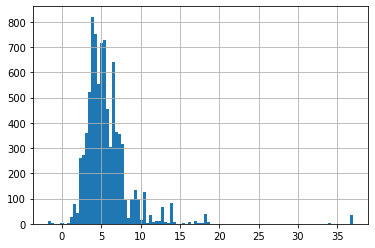

In [54]:
(quarterlyExtremesMean[quarterlyExtremesMean.variable == 'tasmax_hist'].extreme - 4.5).hist(bins = 100)

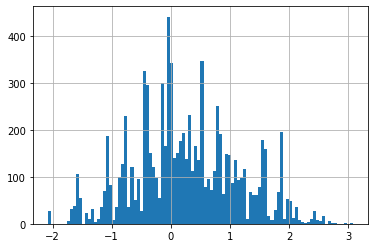

In [53]:
(quarterlyExtremesMean[quarterlyExtremesMean.variable == 'pr_hist'].extreme - 4.5).hist(bins = 100)

In [57]:
sum(quarterlyExtremesMean[quarterlyExtremesMean.variable == 'pr_hist'].extreme > 4.5)/quarterlyExtremesMean[quarterlyExtremesMean.variable == 'pr_hist'].shape[0]

0.5886075949367089

In [58]:
sum(quarterlyExtremesMean[quarterlyExtremesMean.variable == 'tasmax_hist'].\
    extreme > 4.5)/quarterlyExtremesMean[quarterlyExtremesMean.variable == 'tasmax_hist'].shape[0]

0.9983591186122832